In [1]:
def sum_up(n):
    if n == 0:
        return n
    return n + sum_up(n - 1)

print(sum_up(3))


6


In [2]:
def sum_elements(li):
    if not li:
        return 0
    return li[0] + sum_elements(li[1:])

print(sum_elements([1, 1, 2, 3]))

7


In [3]:
def quicksort(li):
    if not li:
        return []
    pivot = li[0]
    left = [e for e in li[1:] if e <= pivot]
    right = [e for e in li[1:] if e > pivot]
    return quicksort(left) + [pivot] + quicksort(right)

### random test

In [4]:
import random

for i in range(1000):
    if i% 100 == 0:
        print("x", end=" ")
    # als include duplicate elements:
    data = list(range(100)) + list(range(50))
    random.shuffle(data)
    assert quicksort(data) == sorted(data)

x x x x x x x x x x 

## About the speed of quicksort

In [17]:
import time
import numpy as np
from statistics import median


def benchmark(algorithm, sizes, do_shuffle):
    """
    measures run time of "algorighm" for different input data sizes.
    runs for every size quicksort multiple times and takes median
    to compensate bias of time measurement due to background 
    processes on the computer.
    
    do_shuffle = True uses randomly shuffled data,
    else data is not sorted but in increasing order.
    
    """
    all_times = []

    for size in sizes:
        data = list(range(size))
        times = []
        print(size, end=" ")
        for i in range(10):
            print(i, end=" ")
            if do_shuffle:
                random.shuffle(data)
            started = time.time()
            algorithm(data)
            needed = time.time() - started
            times.append(needed)

        print()
        all_times.append(median(times))
        
    return np.array(all_times)
    
sizes = np.array((1000, 5000, 8000, 10000, 25000, 50000, 100000, 500000))

all_times = benchmark(quicksort, sizes, True)

1000 0 1 2 3 4 5 6 7 8 9 
5000 0 1 2 3 4 5 6 7 8 9 
8000 0 1 2 3 4 5 6 7 8 9 
10000 0 1 2 3 4 5 6 7 8 9 
25000 0 1 2 3 4 5 6 7 8 9 
50000 0 1 2 3 4 5 6 7 8 9 
100000 0 1 2 3 4 5 6 7 8 9 
500000 0 1 2 3 4 5 6 7 8 9 


In [6]:
from matplotlib import pyplot
import math

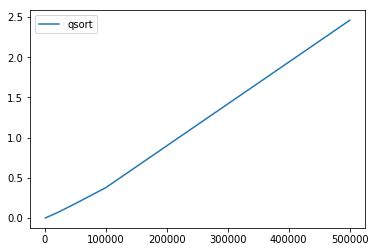

In [7]:
pyplot.plot(sizes, all_times, label="qsort")

pyplot.legend()
pyplot.show()

Theory shows that runtime of quicksort for $n$ elements is on average proportional to $n \log{n}$ for large $n$, which grows only slightly faster than $n$.


[  3.75574561e-07  -1.18869857e-02]


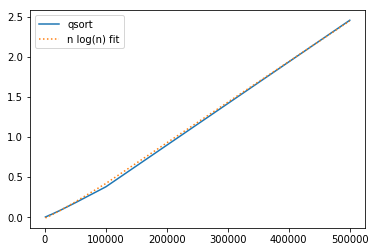

In [8]:
from scipy.optimize import curve_fit

def nlogn(x, a, c):
    return a * np.log(x) * x + c

params, __ = curve_fit(nlogn, sizes, all_times)
print(params)

pyplot.plot(sizes, all_times, label="qsort")

pyplot.plot(sizes, nlogn(sizes, *params), ":", label="n log(n) fit")
pyplot.legend()
pyplot.show()


The situation is different for already sorted data or reversely sorted data. In this case either `left` or `right` is the full list except the pivot element, and thus we don't divide our problem into signifcantly smaller sub problems.


In [9]:
import time
from statistics import median

sizes = np.array((10, 100, 500, 1000, 1500, 2000))

all_times = benchmark(quick_sort, sizes, False)

10 10 10 10 10 10 
100 100 100 100 100 100 
500 500 500 500 500 500 
1000 1000 1000 1000 1000 1000 
1500 1500 1500 1500 1500 1500 
2000 2000 2000 2000 2000 2000 


In [13]:
def quadratic(x, a, b):
    return a * x**2 + b

params, __ = curve_fit(quadratic, sizes, all_times)

In [14]:
print(params)

[  5.40499156e-08   2.99591137e-05]


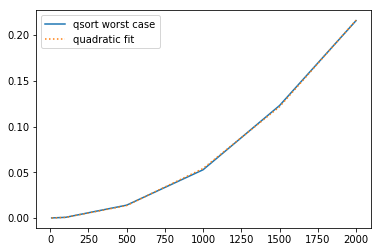

In [16]:
pyplot.plot(sizes, all_times, label="qsort worst case")

fitted = quadratic(sizes, *params)

fac = all_times[0] / sizes[0]
pyplot.plot(sizes, fitted, ":", label="quadratic fit")
pyplot.legend()
pyplot.show()

Now we benchmark the built in `sorted` function:

In [18]:
sizes = np.array((1000, 5000, 8000, 10000, 25000, 50000, 100000, 500000))

all_times = benchmark(sorted, sizes, True)

1000 0 1 2 3 4 5 6 7 8 9 
5000 0 1 2 3 4 5 6 7 8 9 
8000 0 1 2 3 4 5 6 7 8 9 
10000 0 1 2 3 4 5 6 7 8 9 
25000 0 1 2 3 4 5 6 7 8 9 
50000 0 1 2 3 4 5 6 7 8 9 
100000 0 1 2 3 4 5 6 7 8 9 
500000 0 1 2 3 4 5 6 7 8 9 


[  6.09653929e-07  -6.65902094e-03]


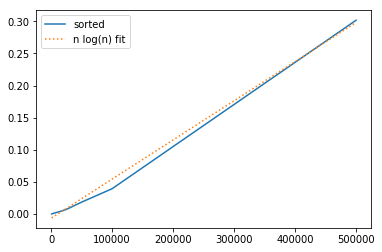

In [23]:
def linear(x, a, c):
    return a * x + c

params, __ = curve_fit(linear, sizes, all_times)
print(params)

pyplot.plot(sizes, all_times, label="sorted")

pyplot.plot(sizes, linear(sizes, *params), ":", label="n log(n) fit")
pyplot.legend()
pyplot.show()

In [24]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND